In [14]:
import os
import time

import pandas as pd
import numpy as np
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib as mpl
# mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
"""Load data as data frame"""
src_train = '/home/melandur/Data/Myocarditis/csv/train/7_merged/'
src_test = '/home/melandur/Data/Myocarditis/csv/test/7_merged/'

def load_data(path):
    files = os.listdir(path)
    df_store = {}
    for file in files:
        if 'aha' in file and 'sample' not in file:
            file_path = os.path.join(path, file)
            df = pd.read_excel(file_path, )
            name = f"{file.split('_')[1]}_{file.split('_')[-1]}".split('.xlsx')[0]
            df_store[name] = df.iloc[:, 1:]  # drop first column
    return df_store

df_train = load_data(src_train)
df_test = load_data(src_test)

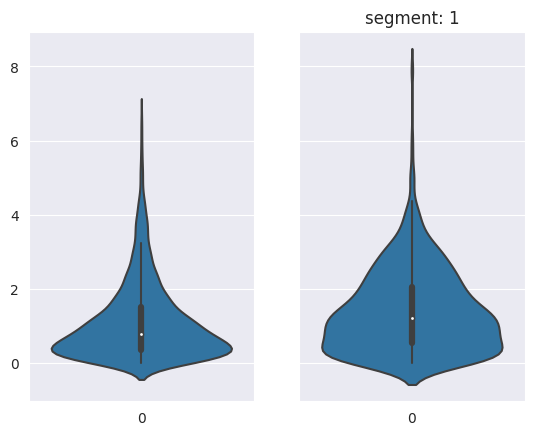

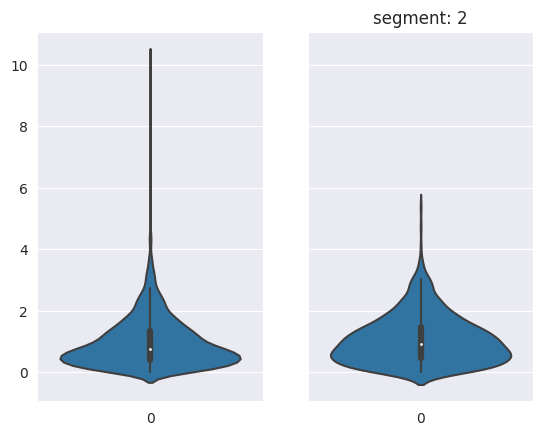

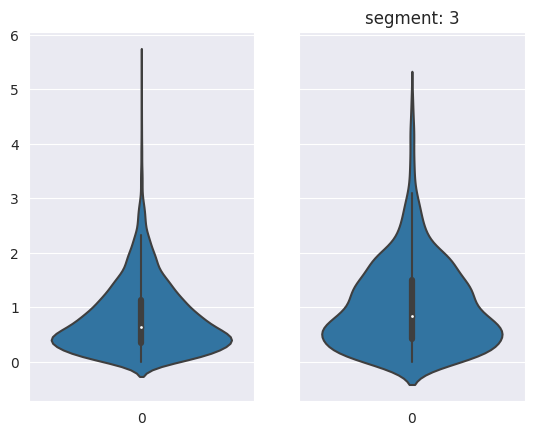

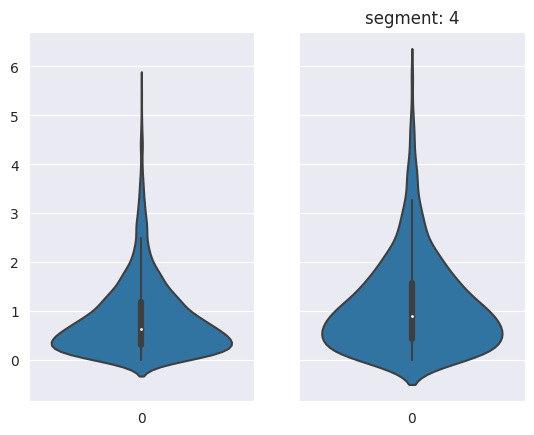

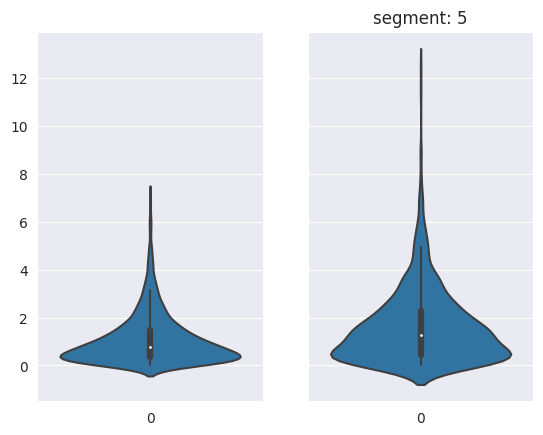

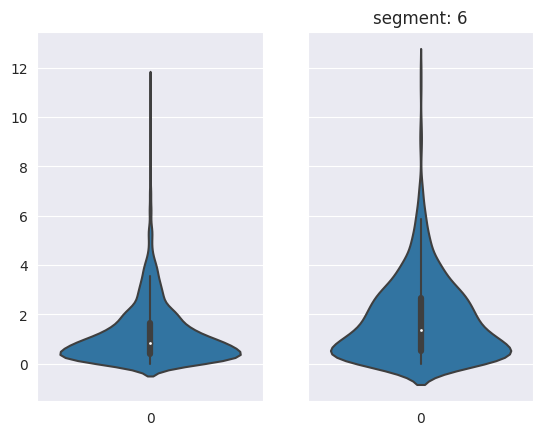

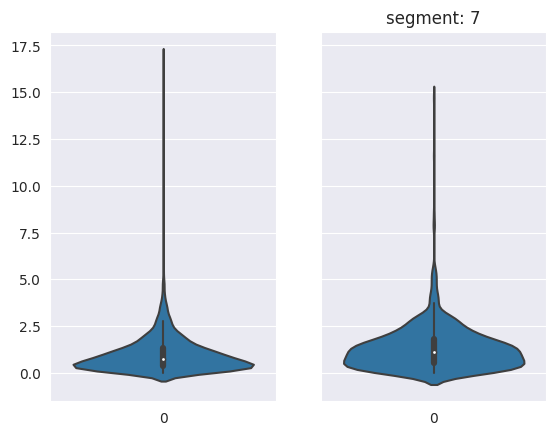

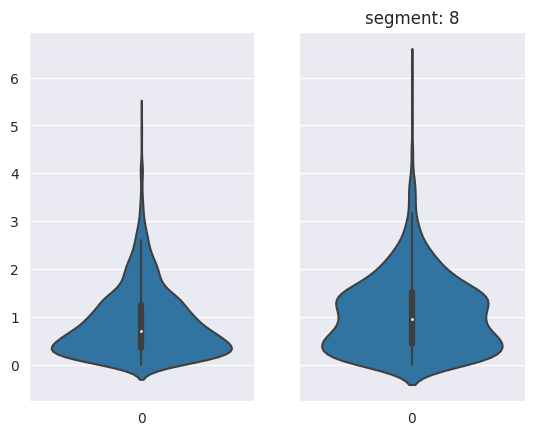

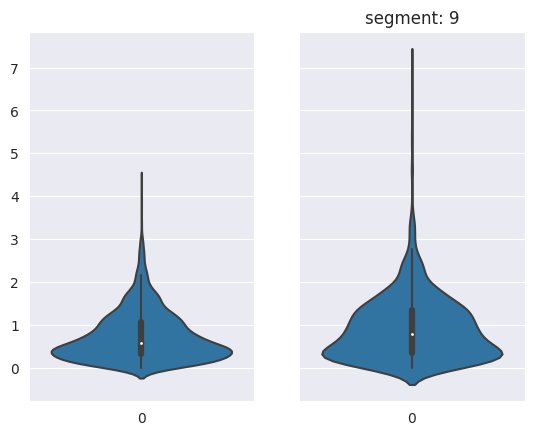

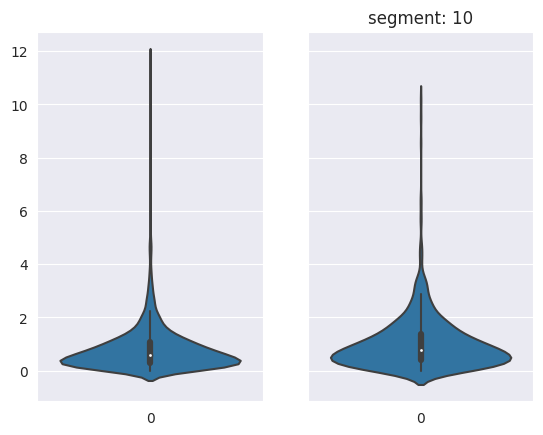

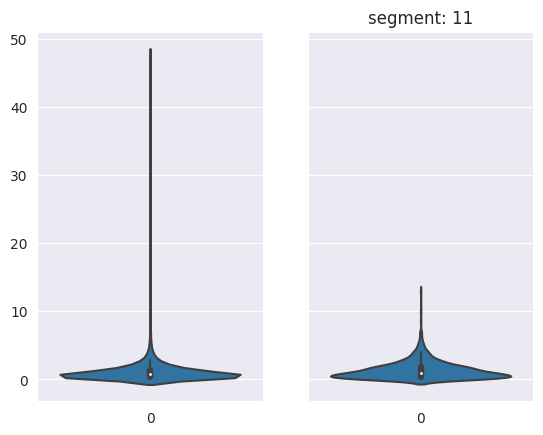

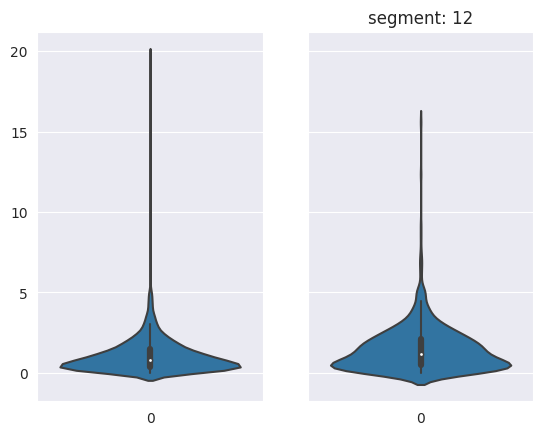

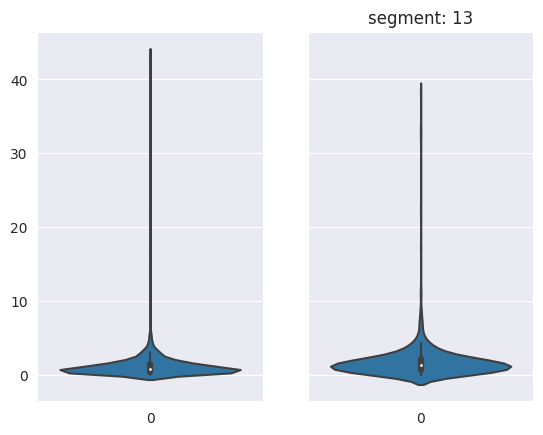

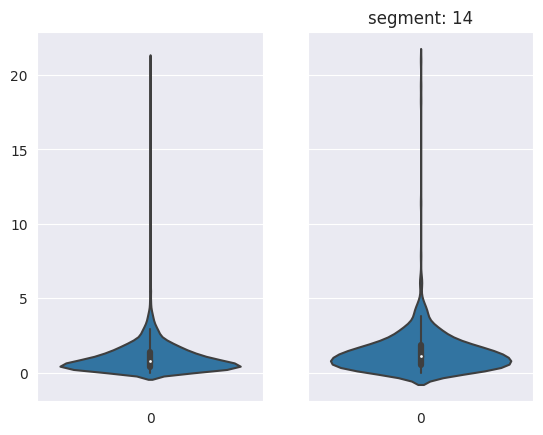

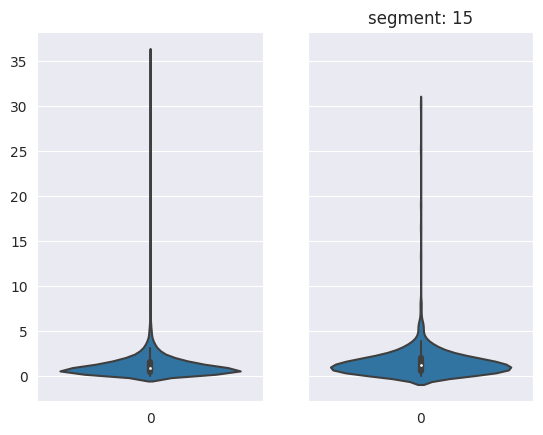

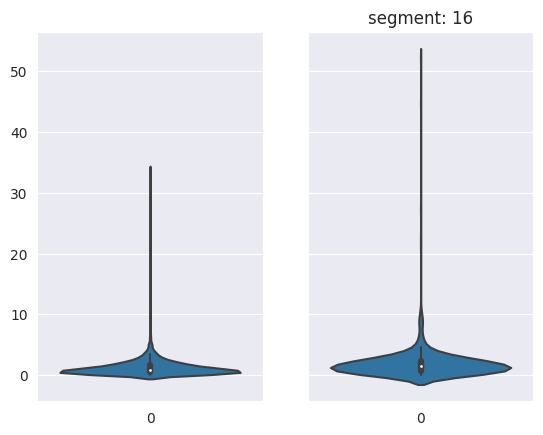

In [121]:
def euclider(store):
    euclid_store = {}
    for idx in range(1, 17):
        df_longit = store[f'longit_{idx}'].iloc[:, :100]
        df_circumf = store[f'circumf_{idx}'].iloc[:, :100]
        df_radial = store[f'radial_{idx}'].iloc[:, :100]

        # euclid distance
        df_longit = abs(df_longit) ** 2
        df_circumf = abs(df_circumf) ** 2
        df_radial = abs(df_radial) ** 2
        summed = df_longit + df_circumf.values + df_radial.values
        euclid_store[f'{idx}'] = summed ** (1 / 2)
    return euclid_store

df_e_train = euclider(df_train)
df_e_test = euclider(df_test)
for x in range(1, 17):
    fig, axes = plt.subplots(1, 2, sharey=True)
    plt.title(f'segment: {x}')
    sns.violinplot(data=df_e_train[f'{x}'].melt()['value'], ax=axes[0])
    sns.violinplot(data=df_e_test[f'{x}'].melt()['value'], ax=axes[1])

In [65]:
# threshold = 1
# idx = 10
# def merge_columns_train(store, idx, threshold):
#     lon = store[f'longit_{idx}'].iloc[:, :threshold]
#     data = lon.melt()
#     rad = store[f'radial_{idx}'].iloc[:, :threshold]
#     rad = rad.melt()
#     data = pd.concat([data, rad], axis=1)
#     cir = store[f'circumf_{idx}'].iloc[:, :threshold]
#     cir = cir.melt()
#     data = pd.concat([data, cir], axis=1)
#     data = data.drop(['variable'], axis=1)
#     header = ['longit', 'radial', 'circumf']
#     data.columns = header
#     return data
#
#
# def merge_columns_test(store, idx):
#     data = store[f'longit_{idx}'].melt()
#     rad = store[f'radial_{idx}'].melt()
#     data = pd.concat([data, rad], axis=1)
#     cir = store[f'circumf_{idx}'].melt()
#     data = pd.concat([data, cir], axis=1)
#     data = data.drop(['variable'], axis=1)
#     header = ['longit', 'radial', 'circumf']
#     data.columns = header
#     return data
#
# df_train = merge_columns_train(df_train, idx, threshold)
# df_test = merge_columns_test(df_test, idx)

NameError: name 'f' is not defined

In [11]:
for i in range(1, 17):
    print(f'## {i} ##')
    x = df_e_train[f'{i}'].melt()
    x = x.drop(x.columns[x.columns.str.contains('variable', case=False)], axis=1)
    x = x['value']
    y = df_e_test[f'{i}'].melt()
    y = y.drop(y.columns[y.columns.str.contains('variable', case=False)], axis=1)
    y = y['value']
    print(f'{round(float(x.mean()), 2)} -- {round(float(y.mean()), 2)}')
    print(f'{round(float(x.median()), 2)} -- {round(float(y.median()), 2)}')
    print(f'{round(float(x.std()), 2)} -- {round(float(y.std()), 2)}')



## 1 ##
246075.23 -- 1.41
0.83 -- 1.21
12868375.89 -- 1.13
## 2 ##
402318.68 -- 1.06
0.73 -- 0.93
18693245.11 -- 0.79
## 3 ##
444865.39 -- 1.04
0.66 -- 0.85
27933616.0 -- 0.81
## 4 ##
272626.35 -- 1.13
0.67 -- 0.91
13936256.66 -- 0.97
## 5 ##
1335812.23 -- 1.62
0.8 -- 1.29
64677092.35 -- 1.55
## 6 ##
300349.1 -- 1.8
0.91 -- 1.38
22495085.03 -- 1.64
## 7 ##
287997.59 -- 1.32
0.75 -- 1.13
14352025.39 -- 1.21
## 8 ##
456067.9 -- 1.07
0.69 -- 0.96
19190172.33 -- 0.8
## 9 ##
370748.24 -- 0.93
0.59 -- 0.79
20546355.74 -- 0.77
## 10 ##
540075.6 -- 1.03
0.59 -- 0.77
25484943.32 -- 1.01
## 11 ##
210930.97 -- 1.37
0.72 -- 0.98
8523173.37 -- 1.33
## 12 ##
304914.06 -- 1.48
0.8 -- 1.18
14251471.78 -- 1.41
## 13 ##
182736.63 -- 1.76
0.85 -- 1.36
10540227.46 -- 2.52
## 14 ##
337420.49 -- 1.39
0.78 -- 1.1
15104422.76 -- 1.54
## 15 ##
903831.93 -- 1.5
0.83 -- 1.19
54751331.2 -- 1.91
## 16 ##
113784.75 -- 1.93
0.91 -- 1.5
6451190.01 -- 2.99
